In [1]:
import sys
sys.path.append('d:\\QUANT_GAME\\python_game\\factor\\factor_lab\\analyze_note')
from analyze_factor_note_init import AnalyzeFactorNotes as Note

---

### 初始化条件

In [2]:
factor_name = 'entropy'
start_date = 20100101
end_date = 20210101
med_tf = False
z_score_tf = False
demean_tf = False
sample_num = None
sample_every_date_tf = False

In [3]:
note = Note(factor_name, start_date, end_date,
                med_tf, z_score_tf, demean_tf,
                sample_num,sample_every_date_tf
            )

#### 加载数据

In [4]:
note.load_data()

---

#### 查看因子相关信息

##### - 因子定义及计算公式

因子名称：熵因子（entropy)    
因子定义：状态变化Q，熵H定义为：$-(Q*ln(1+|Q|))$

状态变化Q，两次变化间隔$\tau_t$，则有：   
$$Q_{t} = State_{t} - State_{t-\tau_t}$$

其中，状态可以在时间窗口$\delta_t$上任意定义，例如：均值、标准差、最大值、中位数、或者其他任何因子指标都可以。此处，状态定义为$delta_t$内的收益r均值，则有：   
$$State_{t} = \frac{1}{\delta_t} \sum_{i=t-\delta_t+1}^{t} r_{i}$$

按照上面熵的定义，因子的计算公式为：
$$factor_{t} = -(Q_{t}*ln(1+|Q_{t}|))$$

#### -因子信息

In [5]:
factor_info = note.get_factor_info()
for k,v in factor_info.items():
    print(k,':',v)

name : entropy
fields : ['close']
other_dIepend_factors : []
calc_params : {'delta_period': 5}
save_h5_path : F:\factor_lab_res\prepared_data\factor_data.h5
value_range : [-0.03636866194666336, 6.789938520367401]
process_suggest_method : None


---

### 因子分析

In [6]:
note.get_data_for_analysis()

In [7]:
zy_fa = note.analysis_factor()

#### 绘制factor-return散点图

- 全部数据

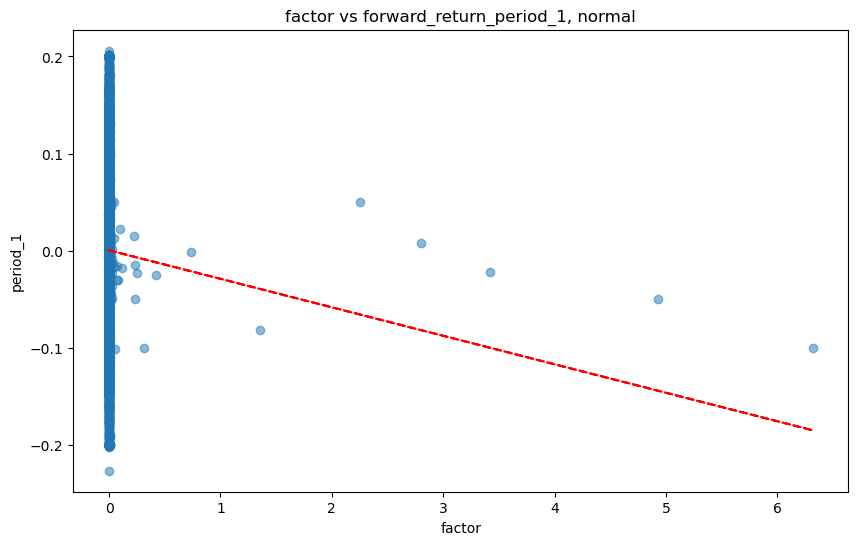

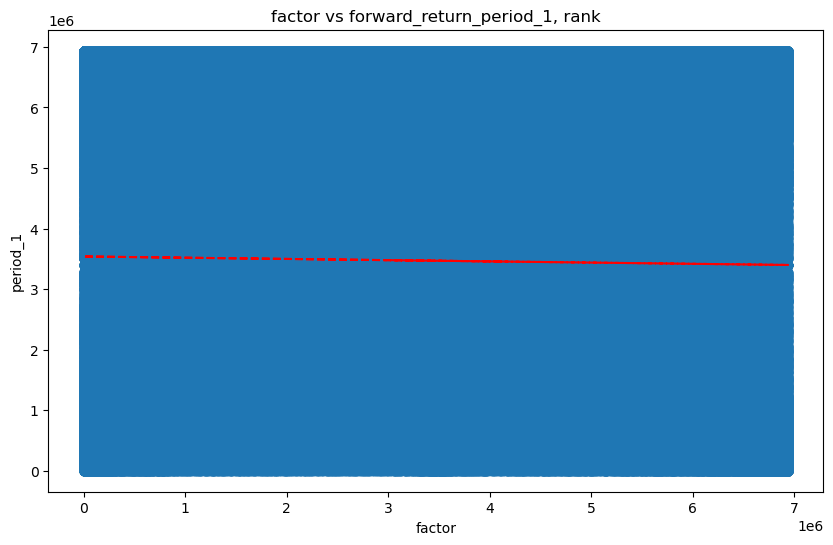

In [8]:
# normal
zy_fa.plot_scatter_and_regression(periods_list=[1,],sample_num=None)
# rank
zy_fa.plot_scatter_and_regression(periods_list=[1,],rank_tf=True,sample_num=None)

- 抽样100000

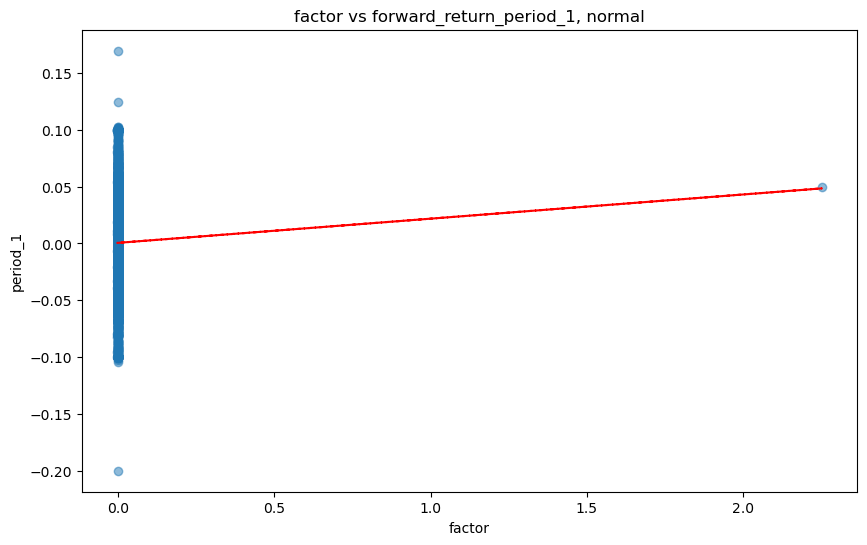

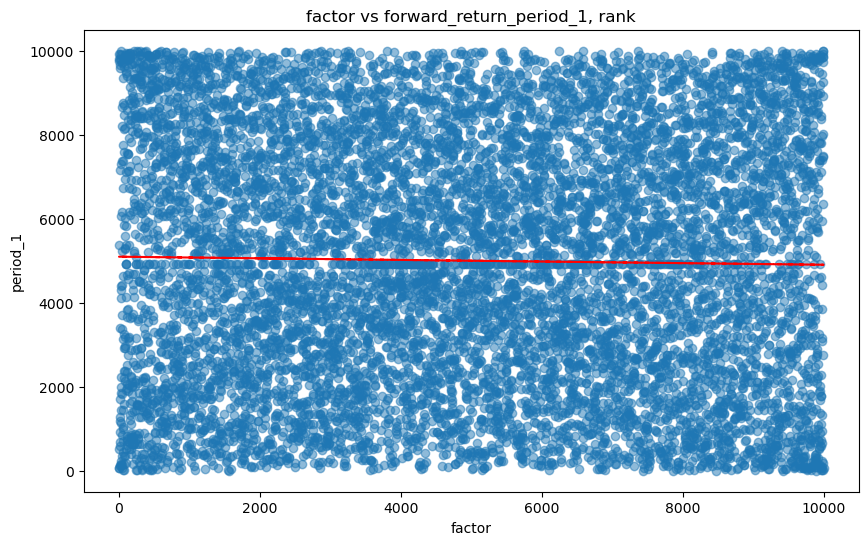

In [9]:
# normal
zy_fa.plot_scatter_and_regression(periods_list=[1,],sample_num=10000)
# rank
zy_fa.plot_scatter_and_regression(periods_list=[1,],rank_tf=True,sample_num=10000)

### 绘制因子分布图

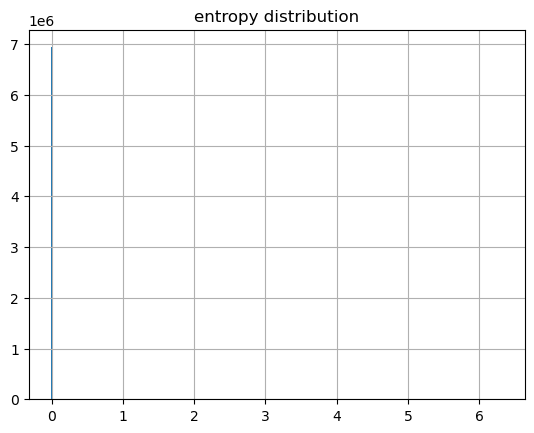

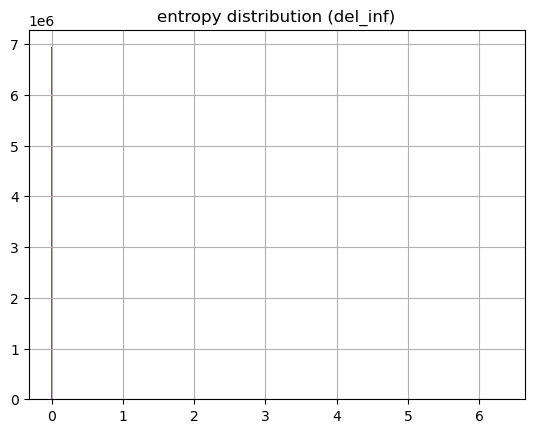

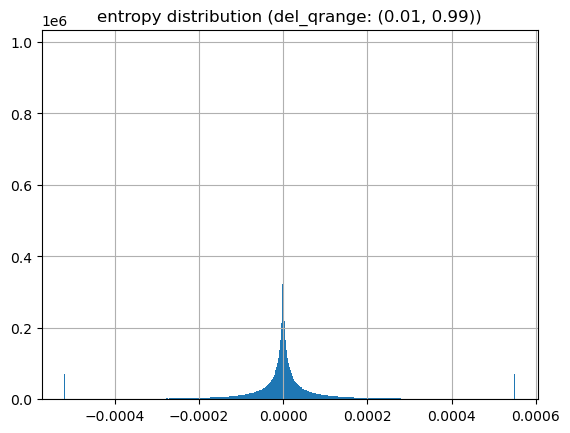

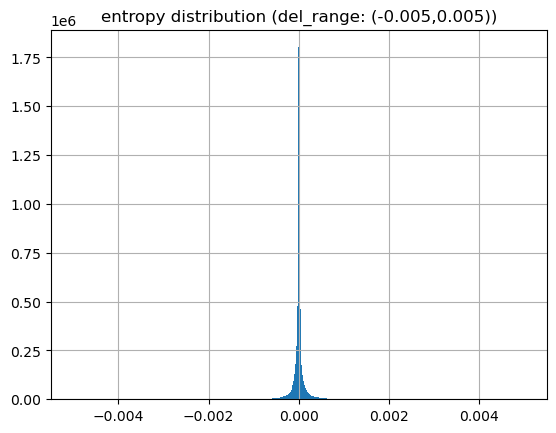

In [10]:
# 原始因子分布图
zy_fa.plot_factor_hist()
# 剔除inf后的因子分布图
zy_fa.plot_factor_hist(del_inf=True)
# 截取分位数qrange的因子分布图
zy_fa.plot_factor_hist(del_qrange=(0.01,0.99))
# 截取给定range的因子分布图
zy_fa.plot_factor_hist(del_range=(-0.005,0.005))

---

#### IC

#### 打印因子ic分析结果

In [11]:
analyze_ic_res = zy_fa.analyze_ic_res()
print('analyze_ic_res:\n',analyze_ic_res)


analyze_ic_res:
                       period_1  period_2  period_3  period_5  period_8  \
norm_ic_mean         -0.036157 -0.019773 -0.014321 -0.003419 -0.004783   
norm_ic_std           0.093403  0.088761  0.087269  0.085021  0.079459   
norm_ic_0.02_percent  0.826103  0.805535  0.795438  0.785714  0.759162   
norm_ic_t                  NaN       NaN       NaN       NaN       NaN   
norm_ir              -0.387105  -0.22276 -0.164107 -0.040216   -0.0602   
norm_abs_ic           -0.00363 -0.002494 -0.002227 -0.002404 -0.002325   
rank_ic_mean           0.00266  0.011067   0.01199  0.020873  0.016115   
rank_ic_std           0.118646  0.112349  0.111469  0.110687  0.105106   
rank_ic_0.02_percent  0.852655  0.842558  0.845176  0.835079  0.828347   
rank_ic_t                  NaN       NaN       NaN       NaN       NaN   
rank_ir               0.022418  0.098506  0.107567  0.188577  0.153326   
rank_abs_ic          -0.020166 -0.002148 -0.003534  0.008517  0.012294   

                    

---

#### 绘制norm_ic的时序图

<Figure size 640x480 with 0 Axes>

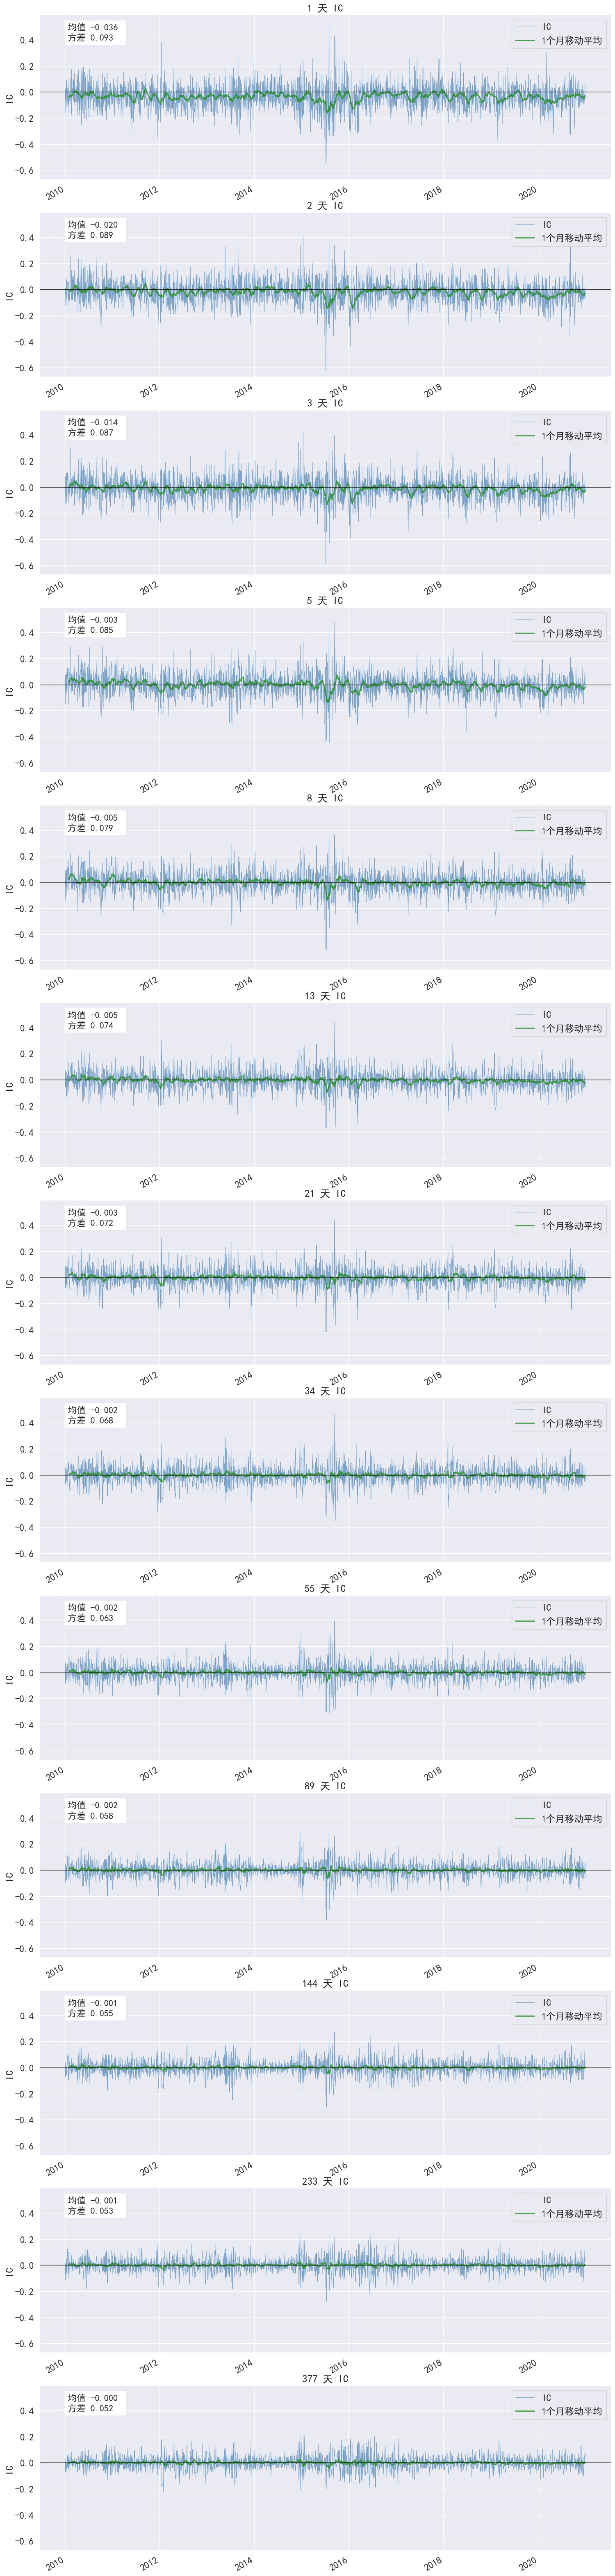

In [12]:
zy_fa.plot_norm_ic_ts()

---

#### 绘制rank_ic的时序图

<Figure size 640x480 with 0 Axes>

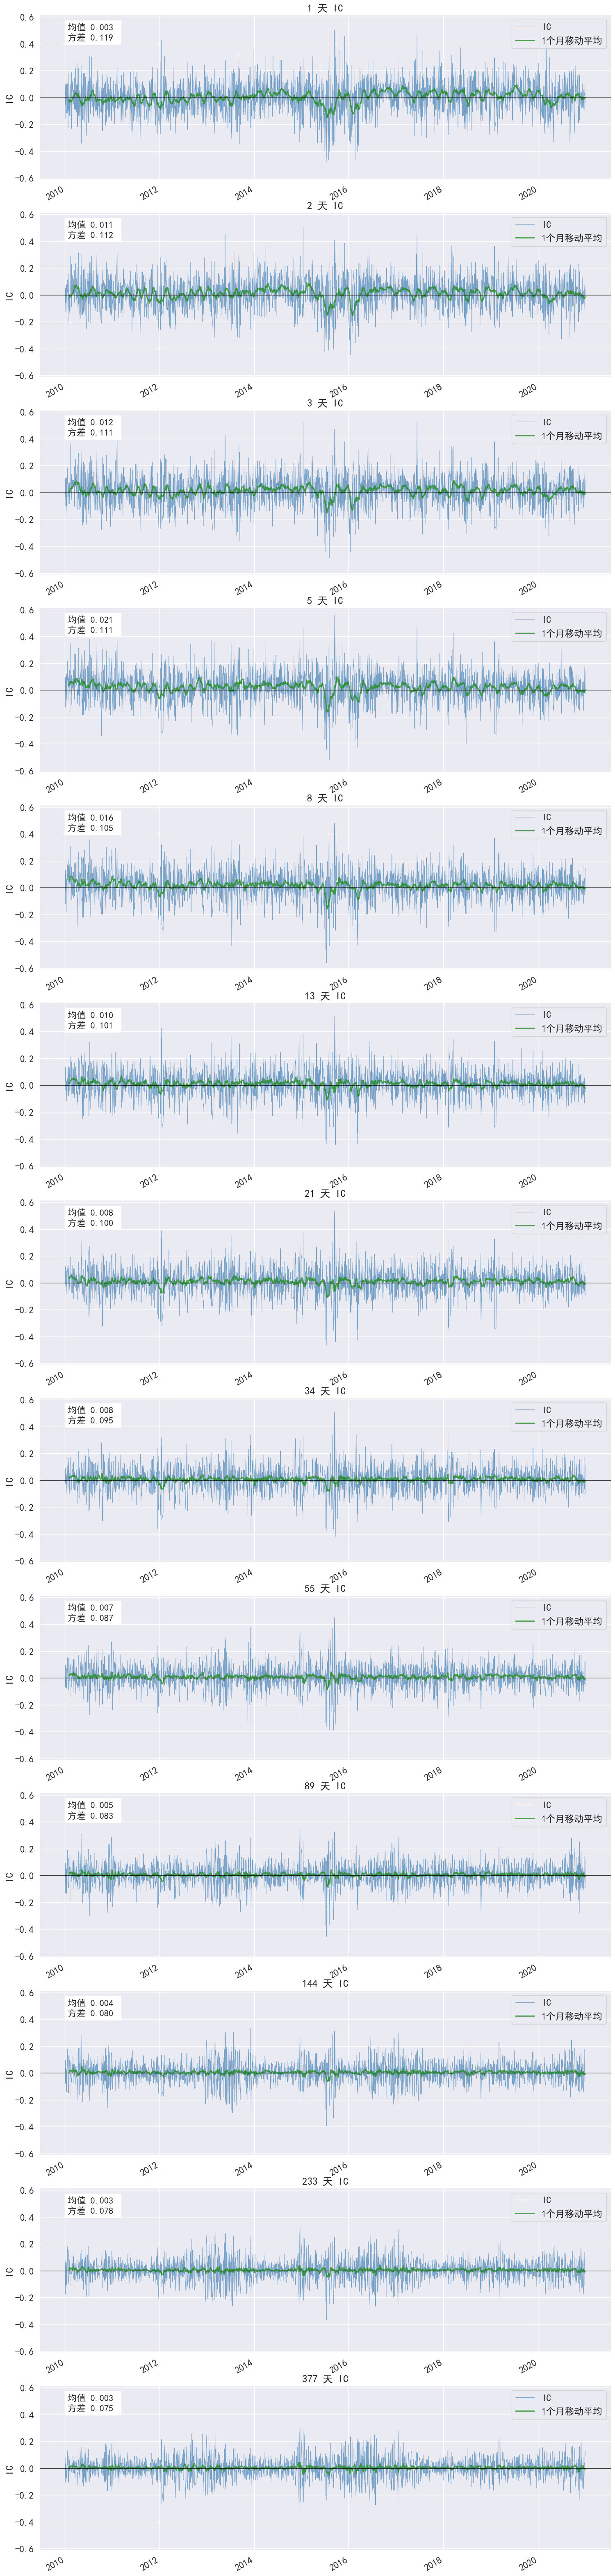

In [13]:
zy_fa.plot_rank_ic_ts()